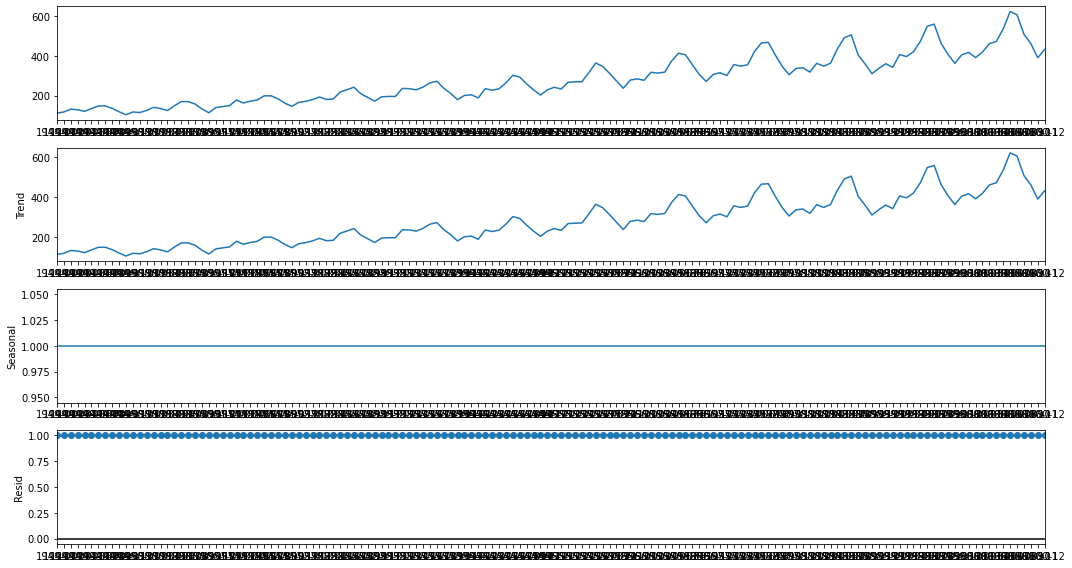

In [2]:
from pandas import read_csv
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
series = read_csv('airline-passengers.csv', header=0, index_col=0)
result = seasonal_decompose(series, model='multiplicative', period=1)
plt.rcParams['figure.figsize'] = [15, 8]
result.plot()
plt.tight_layout()
plt.show()

In [7]:
series

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


<AxesSubplot:xlabel='Month'>

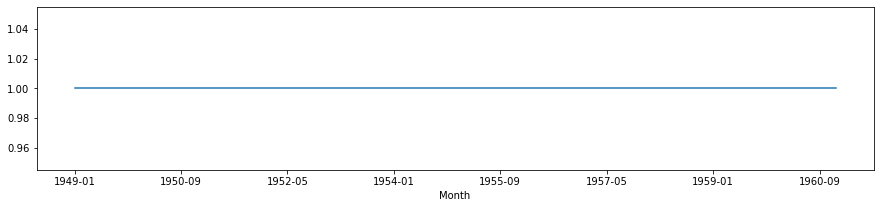

In [4]:
plt.rcParams['figure.figsize'] = [15, 3]
result.seasonal.plot()

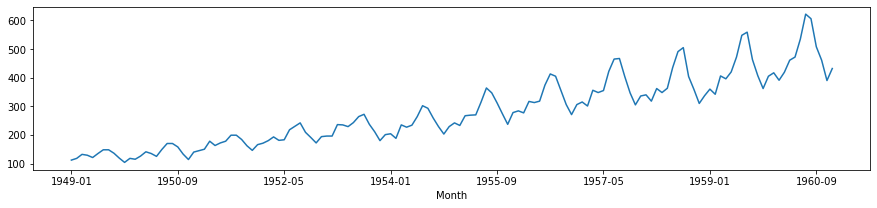

In [5]:
plt.rcParams['figure.figsize'] = [15, 3]
plt.xticks(rotation=90)
result.trend.plot()
plt.show()


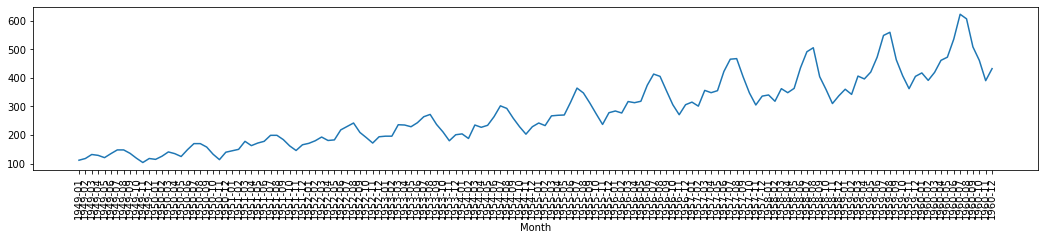

In [6]:
plt.figure(figsize=(18, 3))
sns.lineplot(x=result.observed.index, y=list(
    result.observed), data=result.observed)
plt.xticks(rotation=90)
plt.show()


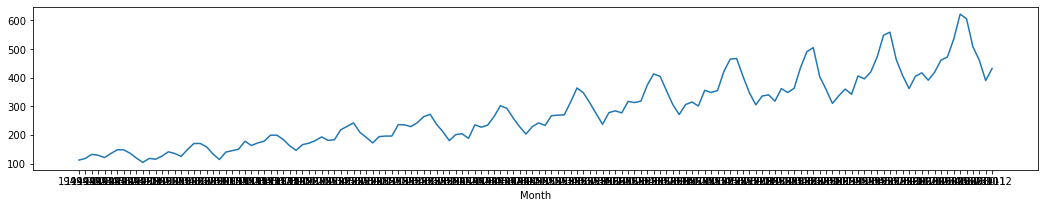

In [33]:
plt.figure(figsize=(18, 3))
sns.lineplot(x=result.trend.index, y=list(
    result.trend), data=result.trend)
plt.show()


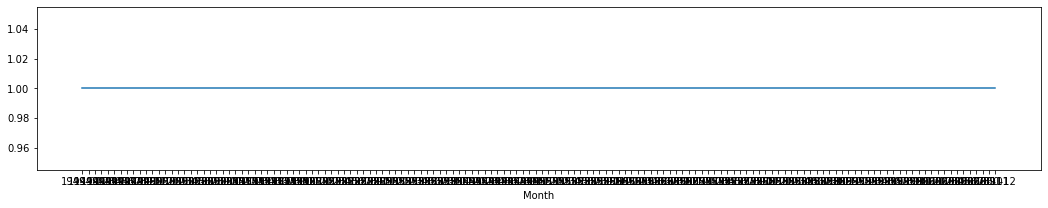

In [35]:
plt.figure(figsize=(18, 3))
sns.lineplot(x=result.seasonal.index, y=list(
    result.seasonal), data=result.seasonal)
plt.show()

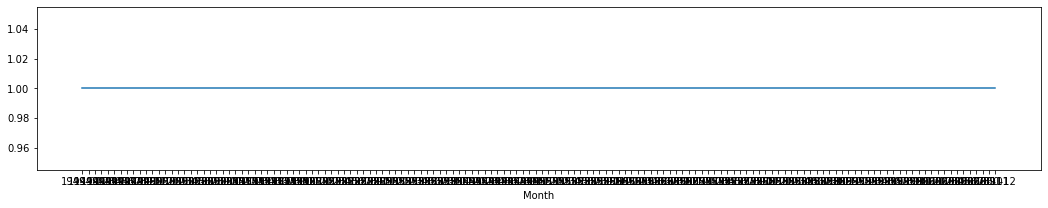

In [34]:
plt.figure(figsize=(18, 3))
sns.lineplot(x=result.resid.index, y=list(
    result.resid), data=result.resid)
plt.show()


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

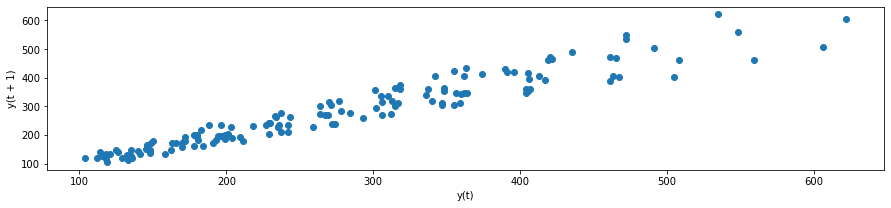

In [8]:
from pandas.plotting import lag_plot
lag_plot(series)


In [11]:
help(result)

Help on DecomposeResult in module statsmodels.tsa.seasonal object:

class DecomposeResult(builtins.object)
 |  DecomposeResult(observed, seasonal, trend, resid, weights=None)
 |  
 |  Results class for seasonal decompositions
 |  
 |  Parameters
 |  ----------
 |  observed : array_like
 |      The data series that has been decomposed.
 |  seasonal : array_like
 |      The seasonal component of the data series.
 |  trend : array_like
 |      The trend component of the data series.
 |  resid : array_like
 |      The residual component of the data series.
 |  weights : array_like, optional
 |      The weights used to reduce outlier influence.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, observed, seasonal, trend, resid, weights=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  plot(self, observed=True, seasonal=True, trend=True, resid=True, weights=False)
 |      Plot estimated components
 |      
 |      Parameters
 |      ----------
 |      

# Temprature Data

In [ ]:
# https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/#:~:text=Autoregression%20is%20a%20time%20series,range%20of%20time%20series%20problems.

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


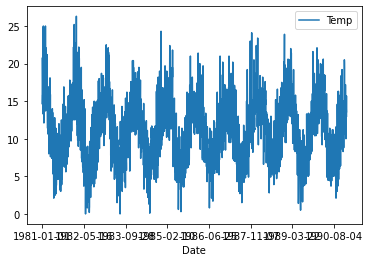

In [43]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
print(series.head())
series.plot()
pyplot.show()


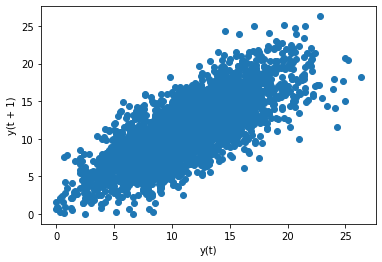

In [47]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
lag_plot(series)
pyplot.show()


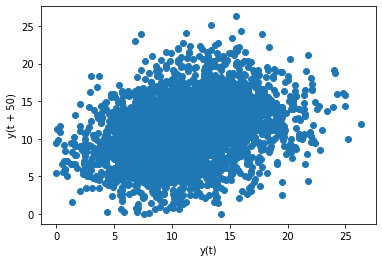

In [51]:
lag_plot(series,50)
pyplot.show()

In [9]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)


         t-1      t+1
t-1  1.00000  0.77487
t+1  0.77487  1.00000


In [11]:
series


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [68]:
dataframe = concat([values.shift(91), values.shift(80), values.shift(1), values], axis=1)
dataframe.columns = ['t-95','t-80', 't-1', 't']
result = dataframe.corr()
print(result)


          t-95      t-80       t-1         t
t-95  1.000000  0.543947  0.001640 -0.011359
t-80  0.543947  1.000000  0.105671  0.089478
t-1   0.001640  0.105671  1.000000  0.774870
t    -0.011359  0.089478  0.774870  1.000000


In [55]:
dataframe

,t-50,t-30,t-1,t+1
0,NaN,NaN,NaN,20.7
1,NaN,NaN,20.7,17.9
2,NaN,NaN,17.9,18.8
3,NaN,NaN,18.8,14.6
4,NaN,NaN,14.6,15.8
...,...,...,...,...
3645,19.2,8.8,14.6,14.0
3646,15.4,14.7,14.0,13.6
3647,13.1,14.7,13.6,13.5
3648,11.5,12.7,13.5,15.7


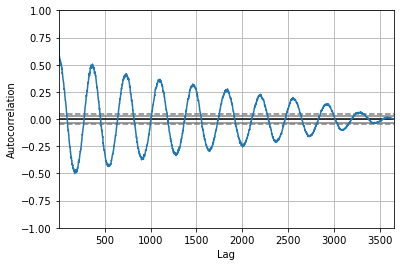

In [56]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
autocorrelation_plot(series)
pyplot.show()


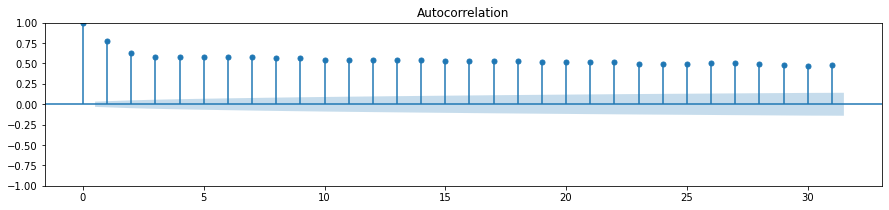

None

In [101]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
pyplot.rcParams['figure.figsize'] = [15, 3]
plot_acf(series, lags=31)
display(pyplot.show())


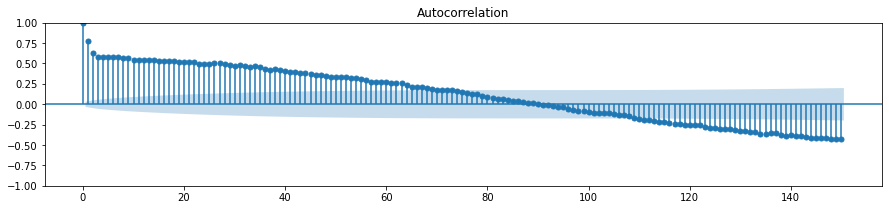

None

In [100]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
pyplot.rcParams['figure.figsize'] = [15, 3]
plot_acf(series, lags=150)
display(pyplot.show())


# persistence model


Test MSE: 3.423


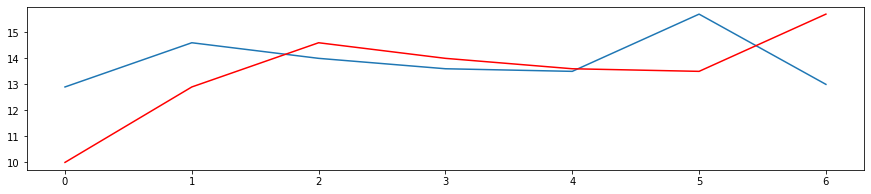

In [104]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:, 0], train[:, 1]
test_X, test_y = test[:, 0], test[:, 1]

# persistence model


def model_persistence(x):
	return x


# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()


In [109]:
test_X, test_y, predictions


(array([10. , 12.9, 14.6, 14. , 13.6, 13.5, 15.7]),
 array([12.9, 14.6, 14. , 13.6, 13.5, 15.7, 13. ]),
 [10.0, 12.9, 14.6, 14.0, 13.6, 13.5, 15.7])

# Autoregressive model

Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


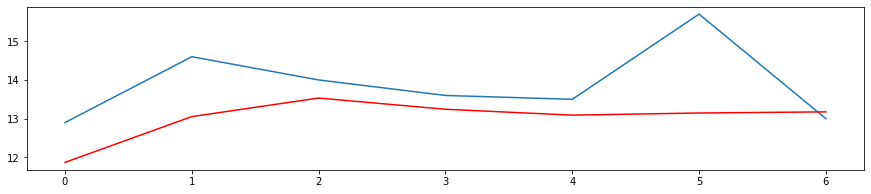

In [103]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('daily-min-temperatures.csv', header=0,
                  index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(
	start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [114]:
import numpy as np
np.argmin(np.abs(model_fit.params))


14

In [117]:
np.round(model_fit.params,2)


array([ 0.56,  0.59, -0.09,  0.05,  0.04,  0.04,  0.03,  0.04,  0.01,
        0.04, -0.  ,  0.  ,  0.02,  0.03,  0.  ,  0.02,  0.01,  0.01,
        0.03, -0.01,  0.02,  0.02,  0.01, -0.02, -0.  ,  0.02,  0.02,
        0.01,  0.01, -0.  ])